<a href="https://colab.research.google.com/github/AilingLiu/Time-Series-Python/blob/main/04_Moving_Average_(MA)_and_ARMA_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests, zipfile, io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

r = requests.get('https://github.com/AilingLiu/Time-Series-Python/raw/main/data.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

# data files available
z.namelist()

['data/',
 'data/.DS_Store',
 '__MACOSX/',
 '__MACOSX/data/',
 '__MACOSX/data/._.DS_Store',
 'data/AMZN.csv',
 '__MACOSX/data/._AMZN.csv',
 'data/CME_HO1.csv',
 '__MACOSX/data/._CME_HO1.csv',
 'data/CME_NG1.csv',
 '__MACOSX/data/._CME_NG1.csv',
 'data/DJI.csv',
 '__MACOSX/data/._DJI.csv',
 'data/HRB.csv',
 '__MACOSX/data/._HRB.csv',
 'data/MSFT.csv',
 '__MACOSX/data/._MSFT.csv',
 'data/Sprint_Intraday.txt',
 '__MACOSX/data/._Sprint_Intraday.txt']

# Mathematical Description of MA(1) Model

$R_t = \mu + ϵ_t + θ ϵ_{t-1}$

- since only one lagged error on right hand side, this is called:
 - MA model of order 1, or
 - MA(1) model
- MA parameter is θ
- Stationary for all values of θ


Interpretation of MA(1) parameter

- negative θ: one period mean reversion
- positive θ: one period momentum
- note: one period autocorrelation is $θ/(1+θ^2)$, not θ


Higher Order of MA Models:

- MA(1)

$R_t = \mu\ + ϵ_t - θ_1 ϵ_{t-1}$

- MA(2)

$R_t = \mu\ + ϵ_t - θ_1 ϵ_{t-1} - θ_2 ϵ_{t-2}$

- MA(1)

$R_t = \mu\ + ϵ_t - θ_1 ϵ_{t-1}- θ_2 ϵ_{t-2} - θ_3 ϵ_{t-3}$

- ...


Using the arima_process module in statsmodels:

when inputting the coefficients, you must include the zero-lag coefficient of 1, but unlike the last chapter on AR models, the sign of the MA coefficients is what we would expect. For example, for an MA(1) process with θ=-0.9, the array representing the MA parameters would be `ma = np.array([1, -0.9])`

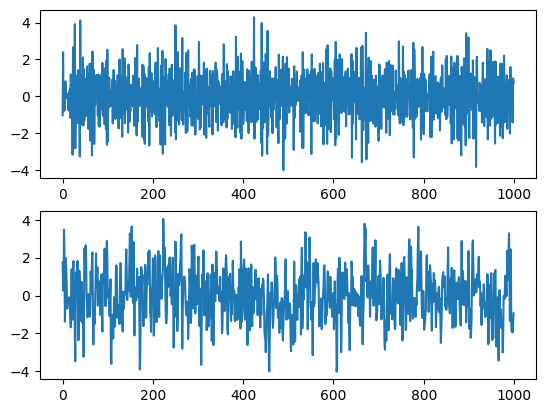

In [2]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

The two MA parameters produce different time series plots, but in the next exercise you'll really be able to distinguish the time series.

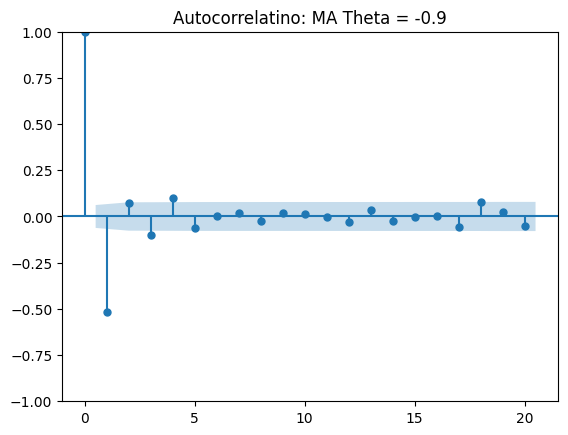

In [5]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: MA parameter = -0.9
plot_acf(simulated_data_1, lags=20)
plt.title('Autocorrelatino: MA Theta = -0.9')
plt.show()

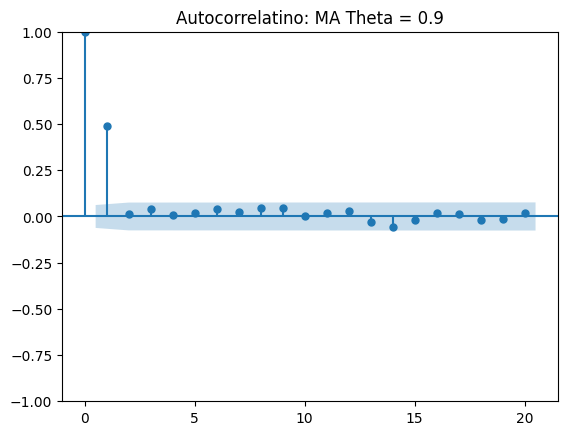

In [6]:
# Plot 2: MA parameter = 0.9
plot_acf(simulated_data_2, lags=20)
plt.title('Autocorrelatino: MA Theta = 0.9')
plt.show()

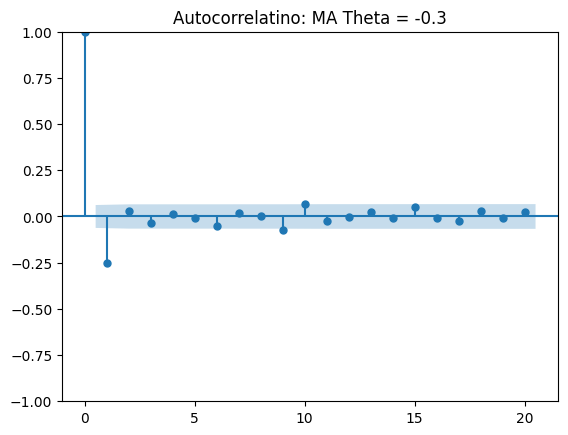

In [7]:
# Plot 3: MA parameter = -0.3
ar3 = np.array([1])
ma3 = np.array([1, -0.3])
MA_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = MA_object3.generate_sample(nsample=1000)

plot_acf(simulated_data_3, lags=20)
plt.title('Autocorrelatino: MA Theta = -0.3')
plt.show()

# Estimate MA Model

We will use the simulated data where we already know the theta, but we will see how well `ARIMA` is estimating theta.

In [8]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Fit an MA(1) model to the first simulated data
mod = ARIMA(simulated_data_1, order=(0,0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta is:")
print(res.params[1])

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1412.524
Date:                Thu, 18 May 2023   AIC                           2831.048
Time:                        20:00:54   BIC                           2845.771
Sample:                             0   HQIC                          2836.643
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0046      0.004     -1.203      0.229      -0.012       0.003
ma.L1         -0.8795      0.016    -55.519      0.000      -0.911      -0.848
sigma2         0.9858      0.044     22.485      0.0

Notice how close the estimated parameter ma.L1 is to the true parameter θ=-0.9.

# Forecasting with MA Model

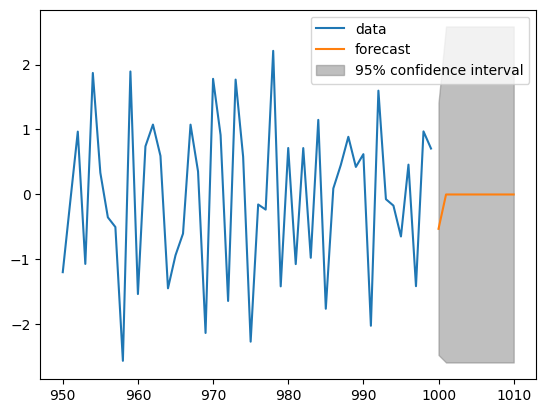

In [11]:
# Import the ARIMA and plot_predict from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict


simulated_data_1 = pd.DataFrame(simulated_data_1, columns=['data'])
# Forecast the first MA(1) model
mod = ARIMA(simulated_data_1, order=(0,0,1))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
simulated_data_1.loc[950:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
plt.show()

Notice that the out-of-sample forecasts are flat into the future after the first data point.

One big difference you will see between out-of-sample forecasts with an MA(1) model and an AR(1) model is that the MA(1) forecasts more than one period in the future are **simply the mean of the sample**.

# ARMA model 

It's a combination of AR and MA model.

$R_t = μ + ϕ R_{t-1} + ϵ_t + θϵ_{t-1}$

ARMA can be converted to pure AR or pure MA models. 

Example of converting AR(1) into an MA(∞).

![Formula](https://raw.githubusercontent.com/AilingLiu/Time-Series-Python/main/math_formula_ar1_to_ma_inf.png)

The first line is AR(1) function. The second line shows $R_{t-1}$ is substitute by $R_{t-2}$, etc. Eventually, you end up with MA(infinity) model with parameters of ϕ.

In [15]:
intraday=pd.read_csv('data/Sprint_Intraday.txt', sep=',',header=None).drop(columns=[2,3,4,5])
intraday.head()

,0,1
0,a1504272600,8.2900
1,1,8.2700
2,2,8.2800
3,3,8.2750
4,4,8.2875


The DataFrame intraday contains one day's prices (on September 1, 2017) for Sprint stock (ticker symbol "S") sampled at a frequency of one minute. The stock market is open for 6.5 hours (390 minutes), from 9:30am to 4:00pm.

Before you can analyze the time series data, you will have to clean it up a little, which you will do in this and the next two exercises. When you look at the first few rows (see the IPython Shell), you'll notice several things. First, there are no column headers.The data is not time stamped from 9:30 to 4:00, but rather goes from 0 to 390. And you will notice that the first date is the odd-looking "a1504272600". The number after the "a" is Unix time which is the number of seconds since January 1, 1970. This is how this dataset separates each day of intraday data.

If you look at the data types, you'll notice that the DATE column is an object, which here means a string. You will need to change that to numeric before you can clean up some missing data.


In [16]:
# import datetime module
import datetime

# Change the first date to zero
intraday.iloc[0,0] = 0

# Change the column headers to 'DATE' and 'CLOSE'
intraday.columns = ['DATE', 'CLOSE']

# Examine the data types for each column
print(intraday.dtypes)

# Convert DATE column to numeric
intraday['DATE'] = pd.to_numeric(intraday['DATE'])

# Make the `DATE` column the new index
intraday = intraday.set_index('DATE')

DATE      object
CLOSE    float64
dtype: object


In [17]:
intraday.head()

,CLOSE
DATE,
0,8.2900
1,8.2700
2,8.2800
3,8.2750
4,8.2875


In [18]:
# If there were no missing rows, there would be 391 rows of minute data
len(intraday)

389

In [19]:
# Everything
set_everything = set(range(391))

# The intraday index as a set
set_intraday = set(intraday.index)

# Calculate the difference
set_missing = set_everything - set_intraday

# Print the difference
print("Missing rows: ", set_missing)

Missing rows:  {182, 14}


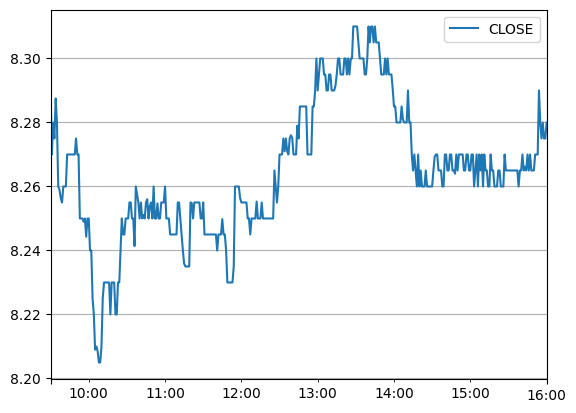

In [20]:
# From previous step
intraday = intraday.reindex(range(391), method='ffill')

# Change the index to the intraday times
intraday.index = pd.date_range(start='2017-09-01 9:30', end='2017-09-01 16:00', freq='1min')

# Plot the intraday time series
intraday.plot(grid=True)
plt.show()

# Applying MA Model

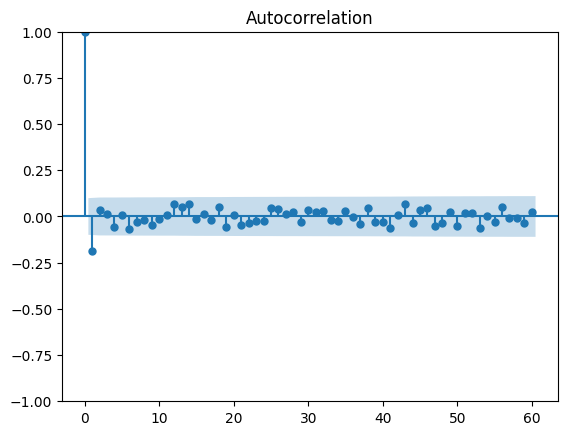

-0.17171619394800597


In [21]:
# Import plot_acf and ARIMA modules from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

# Compute returns from prices and drop the NaN
returns = intraday.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags=60)
plt.show()

# Fit the data to an MA(1) model
mod = ARIMA(returns, order=(0,0,1))
res = mod.fit()
print(res.params[1])

Notice the significant negative lag-1 autocorrelation, just like for an MA(1) model.

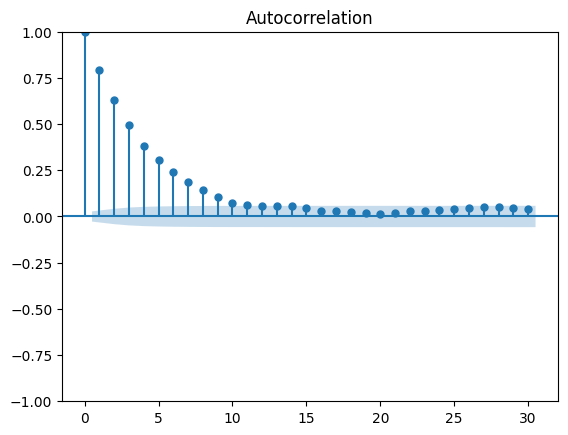

In [22]:
# import the modules for simulating data and plotting the ACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Build a list MA parameters
ma = [0.8**i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()

Notice that the ACF looks the same as an AR(1) with parameter 0.8.